In [40]:
import pandas as pd
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
import matplotlib.pyplot as plt
from mplsoccer import FontManager, add_image
from PIL import Image
# ==============================================================================
plt.rcParams['image.cmap'] = 'magma'
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use(r"C:\Users\gilda\Desktop\Python\Proyecto Futbol\notebooks\neon_dark")


URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)
URL = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)
URL4 = 'https://github.com/google/fonts/blob/main/ofl/bungeeinline/BungeeInline-Regular.ttf?raw=true'
titulo = FontManager(URL4)

In [6]:
URL_GUA = 'https://fbref.com/en/squads/c02b0f7a/2023-2024/Guadalajara-Stats'



# Obtener todas las tablas como una lista
tablas = pd.read_html(URL_GUA)

# Número total de tablas
print(f"Número total de tablas: {len(tablas)}\n")

# Mostrar los primeros encabezados de cada tabla
for i, tabla in enumerate(tablas):
    print(f"Tabla #{i} - Primeras columnas: {tabla.columns.tolist()[:5]}")
    print(tabla.head(1))
    print('-' * 60)


Número total de tablas: 10

Tabla #0 - Primeras columnas: [('Unnamed: 0_level_0', 'Player'), ('Unnamed: 1_level_0', 'Nation'), ('Unnamed: 2_level_0', 'Pos'), ('Unnamed: 3_level_0', 'Age'), ('Unnamed: 4_level_0', 'MP')]
  Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player             Nation                Pos                Age   
0   Fernando Beltrán             mx MEX                 MF               25.0   

  Unnamed: 4_level_0 Playing Time               Performance       ...       \
                  MP       Starts     Min   90s         Gls  Ast  ...   PK   
0                 34           33  2807.0  31.2         4.0  1.0  ...  0.0   

                  Per 90 Minutes                          Unnamed: 21_level_0  
  PKatt CrdY CrdR            Gls   Ast   G+A  G-PK G+A-PK             Matches  
0   0.0  3.0  0.0           0.13  0.03  0.16  0.13   0.16             Matches  

[1 rows x 22 columns]
---------------------------------------

In [7]:
df_Scores = pd.read_html(URL_GUA)[1]
df_Scores.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes
0,2023-07-03,21:00,Liga MX,Apertura 2023 Regular Season,Mon,Away,W,2,1,León,30,24120,Víctor Guzmán,4-3-3,3-4-3,Oscar Mejia,Match Report,NaN
1,2023-07-08,19:05,Liga MX,Apertura 2023 Regular Season,Sat,Home,W,3,1,Atlético,54,34711,Víctor Guzmán,5-4-1,4-2-3-1,Víctor Cáceres,Match Report,NaN
2,2023-07-13,22:00,Liga MX,Apertura 2023 Regular Season,Thu,Home,W,2,0,Necaxa,56,34418,Víctor Guzmán,4-1-4-1,5-4-1,Jesus Lopez,Match Report,NaN
3,2023-08-18,21:10,Liga MX,Apertura 2023 Regular Season,Fri,Away,D,1,1,FC Juárez,41,14976,Jesús Sánchez García,4-3-3,4-2-3-1,Fernando Hernández,Match Report,NaN
4,2023-08-22,20:00,Liga MX,Apertura 2023 Regular Season,Tue,Home,W,1,0,Tijuana,59,27547,Víctor Guzmán,4-2-3-1,4-4-2,Adonai Escobedo,Match Report,NaN


In [8]:
df_Scores.columns 

Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Opp Formation', 'Referee', 'Match Report', 'Notes'],
      dtype='object')

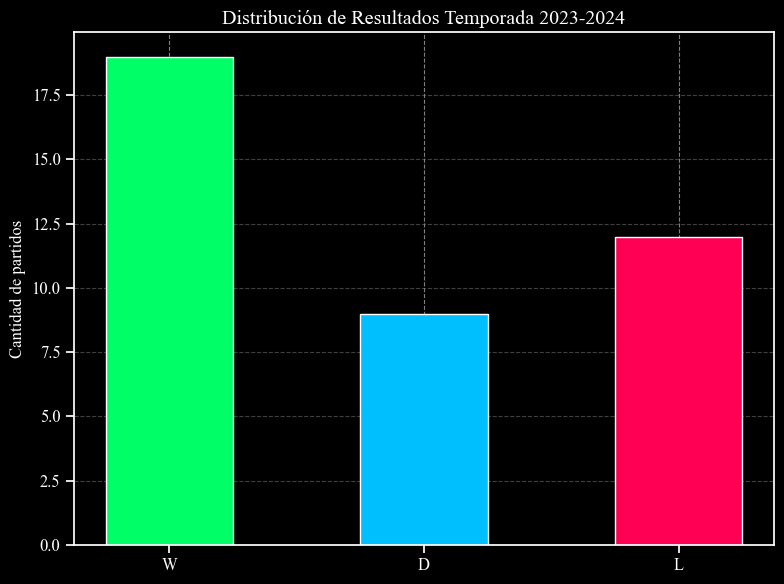

In [41]:
# Contamos cuántas veces aparece cada resultado
result_counts = df_Scores['Result'].value_counts().reindex(['W', 'D', 'L'])
# Acceder al ciclo de colores definido en axes.prop_cycle
color_ciclo = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Colores asignados según el tipo de resultado
colors = {'W': color_ciclo[2], 'D': color_ciclo[0], 'L': color_ciclo[1]}
bar_colors = [colors[result] for result in result_counts.index]

# Crear gráfico de barras (más controlado que hist para este caso)
plt.figure(figsize=(8,6))
bars = plt.bar(result_counts.index, result_counts.values, color=bar_colors, width=0.5)  # width < 1 hace que estén más pegadas

# Etiquetas y estilo
plt.xticks(rotation=0)
plt.ylabel('Cantidad de partidos')
plt.title('Distribución de Resultados Temporada 2023-2024')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Utilizando Seaborns

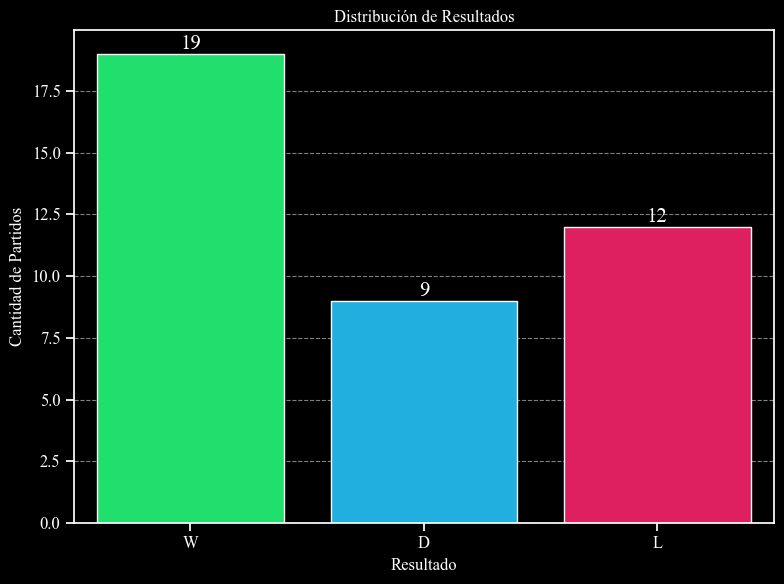

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo bonito
#sns.set_theme(context = 'notebook',style="ticks")

# Mapeo de colores personalizados
custom_palette = {'W': color_ciclo[2], 'D': color_ciclo[0], 'L': color_ciclo[1]}

plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_Scores, x='Result', hue='Result', order=['W', 'D', 'L'],
                   palette=custom_palette, legend=False)


# Agregar los números arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=15)

# Estética adicional
plt.title("Distribución de Resultados", fontsize=12)
plt.ylabel("Cantidad de Partidos")
plt.xlabel("Resultado")
plt.tight_layout()
plt.show()


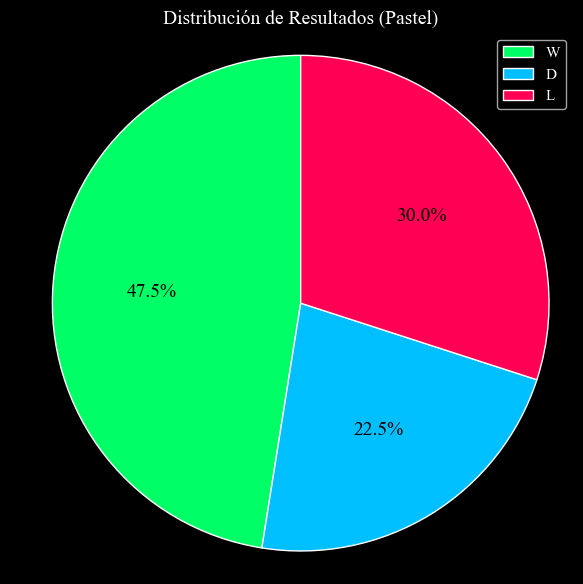

In [60]:
import matplotlib.pyplot as plt

# Conteo de cada resultado
result_counts = df_Scores['Result'].value_counts().reindex(['W', 'D', 'L'])

# Colores usando tu paleta personalizada
colors = [custom_palette[result] for result in result_counts.index]

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(result_counts.values, 
        labels=result_counts.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=colors,
        textprops={'fontsize': 14, 'color': 'black'})

plt.title('Distribución de Resultados (Pastel)', fontsize=14)
plt.axis('equal')  # Hace que el pastel sea perfectamente circular
plt.tight_layout()
plt.legend()
plt.show()


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Víctor Guzmán'),
  Text(1, 0, 'Jesús Sánchez García'),
  Text(2, 0, 'Gilberto Sepúlveda'),
  Text(3, 0, 'Fernando Beltrán'),
  Text(4, 0, 'Javier Hernández'),
  Text(5, 0, 'Isaác Brizuela')])

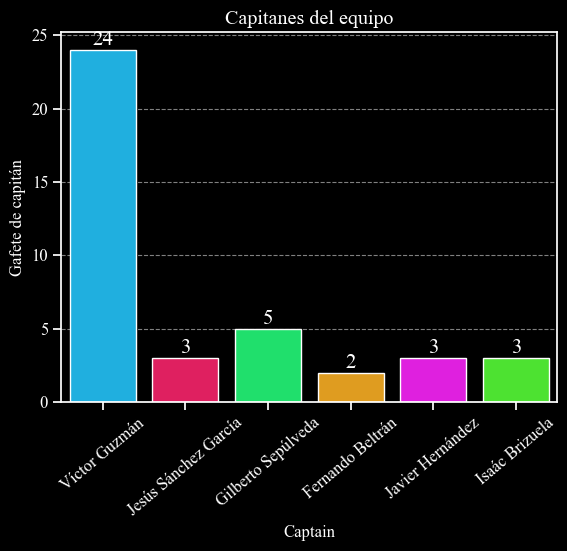

In [54]:
plt.figure()
ax = sns.countplot(data = df_Scores,
                   x = 'Captain',
                   hue='Captain',
                 )

# Agregar los números arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=15)


plt.title('Capitanes del equipo')
plt.ylabel('Gafete de capitán')
plt.xticks(rotation = 40)

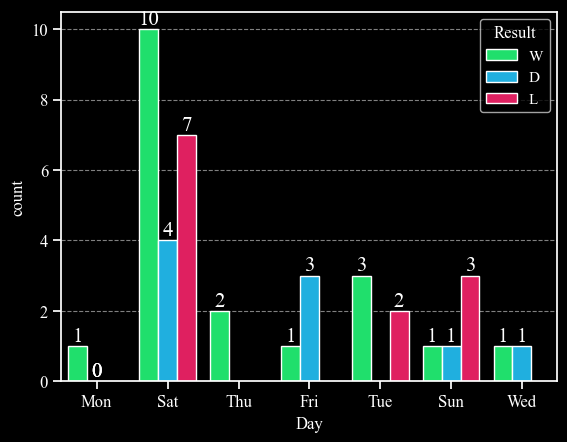

In [56]:
ax = sns.countplot(data=df_Scores, x='Day', hue='Result',palette=custom_palette)
# Agregar los números arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=15)



Text(0.5, 1.0, 'Formaciones con hue=Resultados')

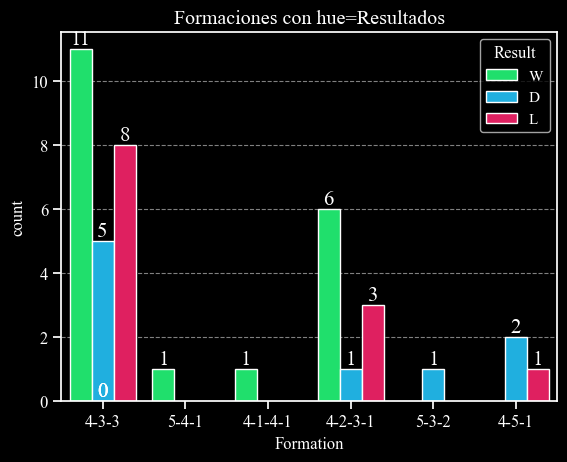

In [62]:
ax = sns.countplot(data=df_Scores, x='Formation', hue='Result',palette=custom_palette)
# Agregar los números arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=15)
    
plt.title('Formaciones con hue=Resultados')

Text(0.5, 1.0, 'Formaciones')

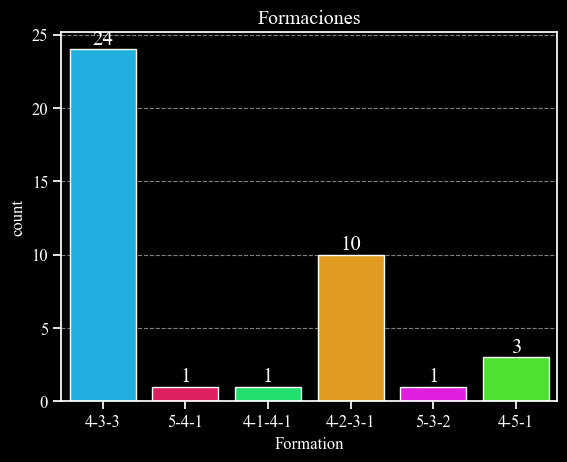

In [64]:
ax = sns.countplot(data=df_Scores, x='Formation', hue='Formation')
# Agregar los números arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=15)
    
plt.title('Formaciones')